# ** 1.Get the Data**

In [2]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2018-10-22 11:50:52--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     760  --.-KB/s    in 0s      

2018-10-22 11:50:52 (69.7 MB/s) - ‘mini_classes.txt’ saved [760/760]



In [0]:
f = open('mini_classes.txt')
classes = f.readlines()
f.close()
classes = [x.replace('\n', '').replace(' ',' ') for x in classes]
classes

In [0]:
!mkdir data

In [0]:
import urllib.request
def download():
  ''' download the dataset'''
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [6]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

#**2. Load data to prepare for the training step **

Notice the limitation for loading data

In [0]:
def load_data(root, train_val_ratio=0.2, max_load_images=4000):
  '''
  return the train data and test data
  '''
  
  all_files = glob.glob(os.path.join(root, '*npy'))
  
  #initialization
  x = np.empty([0,784])
  y = np.empty([0])
  class_names = []
  
  #load data from the npy files
  for idx, file in enumerate(all_files):
    cls_image = np.load(file)
    cls_image = cls_image[:max_load_images,:]
    label = np.full(cls_image.shape[0], idx)
    
    # add it to x and y
    x = np.concatenate((x, cls_image), axis=0)
    y = np.append(y, label)
    
    class_name, _ = os.path.splitext(os.path.basename(file))
    print('load {}.npy'.format(class_name))
    class_names.append(class_name)
    
  #Disrupt data  
  permutation = np.random.permutation(y.shape[0])
  x = x[permutation, :]
  y = y[permutation]
  
  testset_size = int(len(y)*train_val_ratio)
  
  #spilt the train dataset and test dataset
  x_test = x[:testset_size,:]
  y_test = y[:testset_size]
  
  x_train = x[testset_size:,:]
  y_train = y[testset_size:]
  
  return x_train, y_train, x_test, y_test, class_names

In [9]:
# get the data
x_train, y_train, x_test, y_test, classes_name = load_data('data')

load eyeglasses.npy
load shorts.npy
load coffee_cup.npy
load screwdriver.npy
load bread.npy
load line.npy
load bicycle.npy
load cloud.npy
load book.npy
load bird.npy
load ice_cream.npy
load square.npy
load mushroom.npy
load pencil.npy
load drums.npy
load scissors.npy
load frying_pan.npy
load diving_board.npy
load moon.npy
load spoon.npy
load pillow.npy
load ladder.npy
load snake.npy
load sword.npy
load smiley_face.npy
load hammer.npy
load bed.npy
load lollipop.npy
load grapes.npy
load knife.npy
load suitcase.npy
load butterfly.npy
load paper_clip.npy
load headphones.npy
load beard.npy
load rainbow.npy
load umbrella.npy
load car.npy
load dumbbell.npy
load apple.npy
load donut.npy
load wheel.npy
load pants.npy
load stop_sign.npy
load camera.npy
load sun.npy
load broom.npy
load laptop.npy
load moustache.npy
load candle.npy
load tent.npy
load face.npy
load light_bulb.npy
load chair.npy
load bridge.npy
load mountain.npy
load hat.npy
load rifle.npy
load flower.npy
load cup.npy
load clock.npy

In [10]:
num_classes = len(classes_name)
print(len(x_train))  #320000

320000


Text(0.5,1,'scissors')

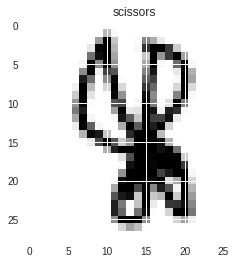

In [11]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  

image_size = 28
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
plt.title(classes_name[int(y_train[idx].item())])

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 3.Build the Model

In [13]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
__________

#4. Train

In [14]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Train on 288000 samples, validate on 32000 samples
Epoch 1/5
 - 52s - loss: 1.9245 - top_k_categorical_accuracy: 0.7802 - val_loss: 1.3615 - val_top_k_categorical_accuracy: 0.8787
Epoch 2/5
 - 40s - loss: 1.2247 - top_k_categorical_accuracy: 0.8950 - val_loss: 1.1430 - val_top_k_categorical_accuracy: 0.9044
Epoch 3/5
 - 22s - loss: 1.0651 - top_k_categorical_accuracy: 0.9125 - val_loss: 1.0639 - val_top_k_categorical_accuracy: 0.9116
Epoch 4/5
 - 16s - loss: 0.9780 - top_k_categorical_accuracy: 0.9215 - val_loss: 0.9909 - val_top_k_categorical_accuracy: 0.9175
Epoch 5/5
 - 42s - loss: 0.9194 - top_k_categorical_accuracy: 0.9273 - val_loss: 0.9389 - val_top_k_categorical_accuracy: 0.9227


# 5.Test

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.24%


# 6.Inference

(1, 100)
['cookie', 'smiley_face', 'face', 'stop_sign', 'moon']


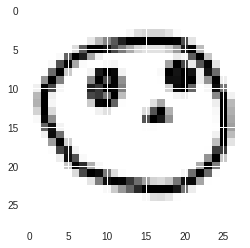

In [21]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 

idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
print(model.predict(np.expand_dims(img, axis=0)).shape)
ind = (-pred).argsort()[:5]
latex = [classes_name[x] for x in ind]
print(latex)

#7.Store the classes and weight

In [22]:
!pip install tensorflowjs

    100% |████████████████████████████████| 13.9MB 2.4MB/s 
    100% |████████████████████████████████| 63.0MB 524kB/s 
    100% |████████████████████████████████| 307kB 16.5MB/s 
    100% |████████████████████████████████| 573kB 11.0MB/s 
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: setuptools 40.4.3
    Uninstalling setuptools-40.4.3:
      Successfully uninstalled setuptools-40.4.3
  Found existing installation: tensorflow 1.12.0rc1
    Uninstalling tensorflow-1.12.0rc1:
      Successfully uninstalled tensorflow-1.12.0rc1
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in classes_name:
        file_handler.write("{}\n".format(item))

In [25]:
model.save('keras.h5')

In [26]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

Using TensorFlow backend.


In [27]:
!cp class_names.txt model/class_names.txt
!zip -r model.zip model
from google.colab import files
files.download('model.zip')

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1 (deflated 7%)
  adding: model/class_names.txt (deflated 41%)
  adding: model/model.json (deflated 85%)
